<a href="https://colab.research.google.com/github/soaresedirlan/data_science/blob/master/titanic_previsao_sobrevivencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Titanic: Machine Learning**

![alt text](https://aventurasnahistoria.uol.com.br/media/_versions/titanic_cgzvpEm_widelg.jpg)

Após colidir com um iceberg em 15 de abril de 1912, seu naufrágio matou 1.502 pessoas de um total de 2.224 passageiros.

Como principal fator contribuinte, logo se descobriu que não havia botes salva-vidas suficientes para toda a tripulação e passageiros.

Obviamente, aqueles que sobreviveram à tragédia contaram com muita sorte, mas será que alguns grupos de passageiros não tiveram "mais sorte" que outros grupos? Será que crianças e mulheres realmente tiveram mais chances de sobreviver? Será que o Jack teve menos chances de escapar do seu destino trágico que a Rose, só pelo fato de ele ter embarcado na 3ª Classe?

Com os dados reais disponibilizados, agora você pode fazer uma análise exploratória, testar suas hipóteses e até mesmo construir um modelo preditivo (que tal descobrir quais seriam suas chances de sobrevivência na 1ª Classe se você tivesse viajado com sua esposa e filho?!)

**Resumidamente, o objetivo deste desafio é utilizar os dados disponíveis para medir a chance de sobrevivência dos passageiros do Titanic.**




## Definição do Problema

A construção do Titanic levou cerca de 2 anos e custou 7,5 milhões de dólares (valores da época). Com 269 metros de comprimento, 28 metros de largura e 53 metros de altura, operava com uma tripulação de 892 pessoas e poderia levar até 2435 passageiros (espalhados pelas três classes disponíveis).

Pensado para ser o mais seguro e luxuoso navio da época, foi lançado ao mar em 1911, ganhando fama de ser "inafundável".

A descrição completa da competição, assim como o conjunto de dados, está disponível na página do Kaggle [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic).

O naufrágio do Titanic teve como fatores contribuintes causas naturais (como o clima) e causas humanas (negligência e excesso de confiança). Independente das causas, o fato é que seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.

Embora aqueles que escaparam com vida tiveram sua boa dose de sorte, alguns grupos de pessoas eram mais propensos a escaparem da morte do que outros. Por exemplo, mulheres, crianças e passageiros da 1ª Classe. Assim, nota-se que existe algum padrão que pode ser extraído dos dados brutos.

### Objetivo
**Análise sobre quais variáveis tiveram maior influência na probabilidade de sobrevivência** (ou seja, que tipo de pessoa teve mais chance de escapar com vida).

Após analisar os dados, foi criado **um modelo que mostra a previsão de sobrevivência** para um passageiro qualquer que seja fornecido como *input*.



## Obtenção dos Dados

Os dados disponibilizados no meu gitHub: https://bit.ly/2UerXa6.
    


In [ ]:
#Montar o seu drive.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Permitir vizualiza todas as colunas
pd.options.display.max_columns = None

#Renderizar o grafico direto no notebook
%matplotlib inline

In [ ]:
titanic = pd.read_csv('/content/drive/My Drive/data_science/datasets/titanic.csv')

## Exploração dos Dados

Em uma análise inicial, serão estudadas cada variável. É importante verificar seu nome, tipo, porcentagem de valores faltantes, presença de outliers e tipo de distribuição.

Como se trata de um Aprendizado Supervisionado (*Supervised Learning*), a variável ```Survived``` é definida como sendo a nossa variável alvo (*target*).

### Dicionário de Dados

* **PassengerId:** Número de identificação do passageiro
* **Survived:** Informa se o passageiro sobreviveu ao desastre
    * 0 = Não
    * 1 = Sim
* **Pclass:** Classe do bilhete
    * 1 = 1ª Classe
    * 2 = 2ª Classe
    * 3 = 3ª Classe
* **Name:** Nome do passageiro
* **Sex:** Sexo do passageiro
* **Age:** Idade do passageiro
* **SibSp:** Quantidade de cônjuges e irmãos a bordo
* **Parch:** Quantidade de pais e filhos a bordo
* **Ticket:** Número da passagem
* **Fare:** Preço da Passagem
* **Cabin:** Número da cabine do passageiro
* **Embarked:** Porto no qual o passageiro embarcou
    * 1 - C = Cherbourg
    * 2 - Q = Queenstown
    * 3 - S = Southampton

**Quais os tipos de cada variável?**

* Variáveis Numéricas
    * Discretas
        * Pclass
        * SibSp
        * Parch
    * Contínuas
        * Age
        * Fare
    * Alvo
        * Survived
    * Chave Primária
        * PassengerId
* Variáveis Categóricas
    * Name
    * Sex
    * Ticket
    * Cabin
    * Embarked

In [ ]:
#Verificando as dimensões do dataframe
print("Colunas:\t{}\nRegistros:\t{}".format(titanic.shape[1], titanic.shape[0]))

In [ ]:
#Ver as 5 primeiras entradas do conjunto de dados
display(titanic.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,3.0,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0,1.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,3.0,1.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,3.0,NaN


In [ ]:
#Identificar o tipo de cada variável
display(titanic.dtypes)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked       float64
Survived       float64
dtype: object

In [ ]:
#Instalando o pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
#Import o ProfileReport
from pandas_profiling import ProfileReport

In [ ]:
#Executando o profile
profile = ProfileReport(titanic, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})
profile

**Qual a porcentagem de valores faltantes?**

A informação sobre a **Cabin** é a que possui o maior número de informações faltantes, com mais de 77%. Após, a coluna **Age** não possui valor em quase 20% dos passageiros. Por fim, a coluna informando o Porto de embarque (**Embarked**) possui apenas 2% de informações faltantes.

In [ ]:
(titanic.isnull().sum() / titanic.shape[0]).sort_values(ascending=False)

Cabin          0.771044
Age            0.198653
Survived       0.002245
Embarked       0.002245
Fare           0.000000
Ticket         0.000000
Parch          0.000000
SibSp          0.000000
Sex            0.000000
Name           0.000000
Pclass         0.000000
PassengerId    0.000000
dtype: float64

**Como é a distribuição estatística dos dados?**

In [ ]:
titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000,889.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,2.535433,0.384702
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.792088,0.486799
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,2.000000,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,3.000000,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,3.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


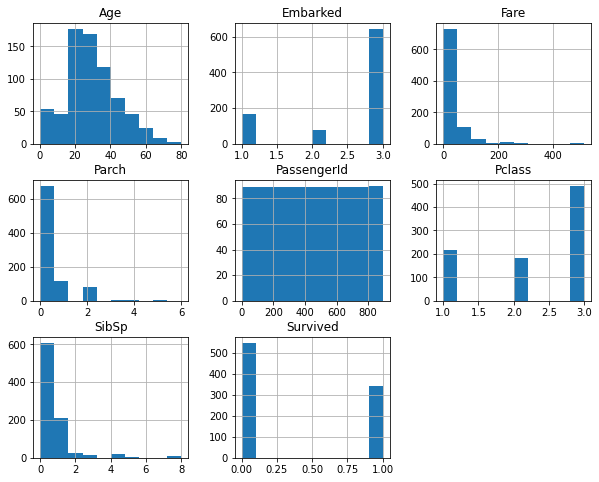

In [ ]:
#Ver histograma das variaveis numericas
titanic.hist(figsize=(10,8));

**Quais grupos de pessoas tinham mais chances de sobrevivência??**

In [ ]:
#Analisar a probabilidade de sobrevivencia pelo sexo
titanic[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.189565


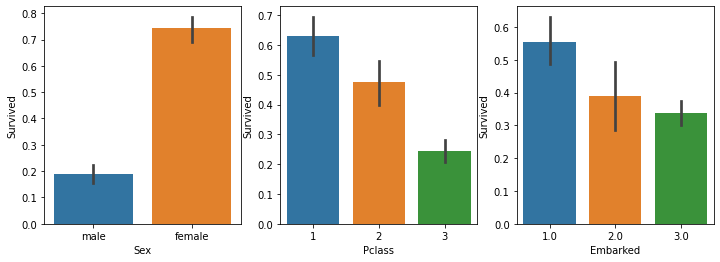

In [ ]:
#Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=titanic, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=titanic, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=titanic, ax=axis3);

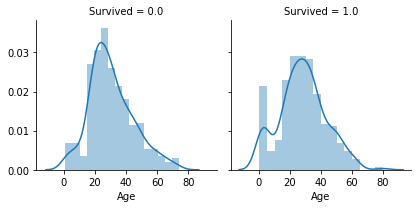

In [ ]:
#Ver influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(titanic, col='Survived')
age_survived.map(sns.distplot, 'Age')


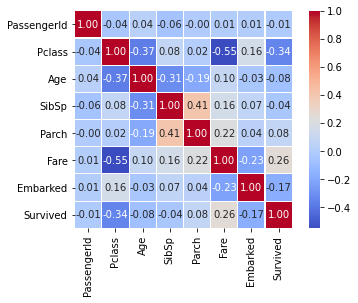

In [ ]:
#Plotar o heatmap para as variáveis numéricas
sns.heatmap(titanic.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

Pouca gente sabe que o método ```df.describe()``` pode ser usado também para ver algo sobre a estatística descritiva em colunas que não são números. Para isso, é só passar o argumento ```include=['O']```. 

**ATENÇÃO, é a letra 'O', e não o número 0!**

In [ ]:
titanic.describe(include=['O'])

,Name,Sex,Ticket,Cabin
count,891,891,891,204
unique,891,2,681,147
top,"Reynaldo, Ms. Encarnacion",male,1601,G6
freq,1,577,7,4


Olhando esses dados a gente observa que:
* Os valores para ```Name``` são únicos, um para cada pessoa;
* Não há *missing values* para ```Name``` e ```Sex```;
* Existem apenas os sexos Masculino e Feminino, sendo que o com maior frequência é o Masculino (577/891 = 65%);
* O Porto no qual embarcaram mais passageiros é o de S = Southampton.

## Preparação dos Dados

### Juntando os *datasets* de treino e teste

Uma dica para quando você vai preparar os dados para um modelo de *Machine Learning* é juntar os *datasets* de treino e teste em um único, e separar novamente no final.

Muitas vezes a gente vai fazer um *feature engineering*, criar variáveis *dummy* ou codificar as variáveis. Daí, nosso modelo vai ser treinado em cima dessa arquitetura, e os dados de teste vão ter que seguir essa mesma estrutura.

Por isso, é muito mais fácil fazer todas as etapas para um único *DataFrame* e dividir novamente entre treino e teste.



### Remoção de atributos irrelevantes

Os atributos ```survival``` (objetivo ou label), e atributos que descrevem os passageiros ou os agrupam em categorias são úteis e serão mantidos, por exemplo: ```Pclass```, ```Sex```, ```Age```, ```SibSp```, ```Parch```, ```Fare``` e ```Embarked```. 


* ```passengerId``` é apenas uma chave primária para identificar um passageiro e não é relevante para o problema.

* ```Name``` náo é útil para previsão, mas pode ser útil para identificação dos registros ou pós-processamento (por exemplo, extrair o último nome).

* ```Ticket``` não identifica o registro e nem descreve o passageiro, por isso, deve ser removido.


In [ ]:

titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

### Valores omissos ou inconssistentes




Vamos dar uma olhada nos valores que faltam em cada columna e tratar esses campos vazios.

Normalmente, há duas abordagens mais utilizadas quando a gente encontra *missing values*:
* Preencher esses valores arbitrariamente (média, mediana, valor mais frequente); e
* Excluir a linha inteira.

Cada caso é um caso e novamente você, cientista de dados, é quem vai tomar a decisão sobre qual passo seguir.

Na maioria das vezes não é desejável jogar informação de uma linha inteira só por causa de um campo faltando. Sempre que possível é melhor você preencher o campo, e é isso que vamos fazer.

Em atributos numéricos , as possibilidades são:

1. substituir por zeros;
2. substituir por um valor médio ou mediano;
3. estimar valores usando modelos estatísticos ou preditivos;
4. particionar a base em registros completos e registros incompletos.

In [ ]:
#Completar ou apagar valores faltantes nos datasets de treino e teste
titanic.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      2
dtype: int64

Para as variáveis idade e tarifa, vou colocar o valor da mediana, e para a variável do porto de embarque, vou colocar o valor com maior frequência.

In [ ]:
#Age
age_median = titanic['Age'].median()
titanic['Age'].fillna(age_median, inplace=True)

#Survived
survived_top = titanic['Survived'].value_counts()[0]
titanic['Survived'].fillna(survived_top, inplace=True)

#Embarked
embarked_top = titanic['Embarked'].value_counts()[1]
titanic['Embarked'].fillna(embarked_top, inplace=True)

In [ ]:
#Ver como ficou os valores Faltantes
titanic.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64

###Transformando tipo de dados

In [ ]:
#Mudar tipo de variavel

titanic.Age = titanic.Age.astype('int')
titanic.Survived = titanic.Survived.astype('int')
titanic.Embarked = titanic.Embarked.astype('int')

### Detectando outliers

Outliers são valores extremos. A estatística descritiva, em geral, provê um bom indicativo da presença de outliers, com valores máximos e mínimo muito distantes; o valor da média muito próximo de um máximo ou mínimo, mostrando problema de distribuição dos dados.

Registros com valores extremos:
     Pclass     Sex  Age  SibSp  Parch      Fare  Embarked  Survived
258       1  female   35      0      0  512.3292         1         1
679       1    male   36      0      1  512.3292         1         1
737       1    male   35      0      0  512.3292         1         1


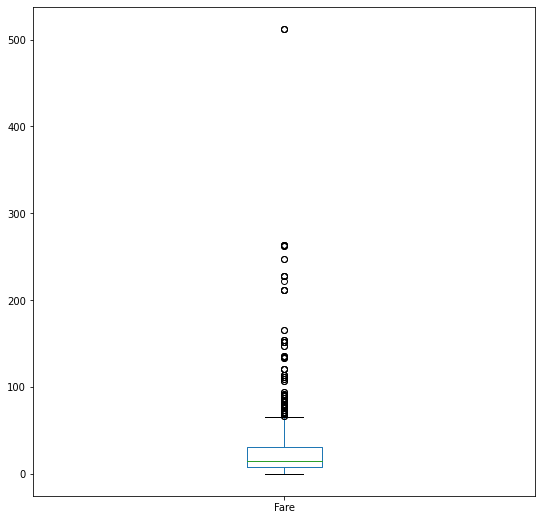

In [ ]:
titanic["Fare"].plot(kind="box", figsize=(9,9))

index = np.where(titanic["Fare"] == max(titanic["Fare"]) )

print("Registros com valores extremos:",titanic.loc[index], sep='\n')

### Criando novos atributos

Vamos criar uma nova variável ```Family```, que irá unir, conjude e irmãos (```SibSp```) com pais e filhos (```Parch```).

In [ ]:
titanic["Family"] = titanic["SibSp"] + titanic["Parch"] + 1

#Encontrando quem tem a maior família À bordo

most_family = np.where(titanic["Family"] == max(titanic["Family"]))

print("\nAs maiores famílias à bordo:\n{0}".format(titanic.loc[most_family]))


As maiores famílias à bordo:
     Pclass     Sex  Age  SibSp  Parch   Fare  Embarked  Survived  Family
159       3    male   28      8      2  69.55         3         0      11
180       3  female   28      8      2  69.55         3         0      11
201       3    male   28      8      2  69.55         3         0      11
324       3    male   28      8      2  69.55         3         0      11
792       3  female   28      8      2  69.55         3         0      11
846       3    male   28      8      2  69.55         3         0      11
863       3  female   28      8      2  69.55         3         0      11


 Os atributos agora estão redundantes, ou muito correlacionados, como podemos ver com a matriz de correlação. A matriz só funciona com tipos de ddos numéricos. Será possível perceber que a variável ```Family``` terá forte correlação (acima de 0.75) com ```SibSp``` e ```Parch```.

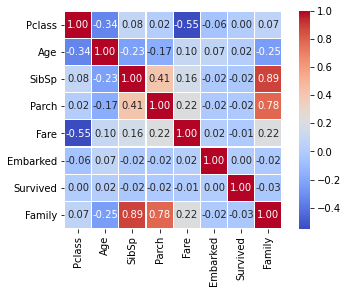

In [ ]:
#Plotar Correlação Novamente
sns.heatmap(titanic.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', annot=True);

In [ ]:
#Deletando colunas não necessarias
titanic.drop(['SibSp','Parch'], axis=1, inplace=True)

### Preparar as variáveis pro modelo

O modelo matemático exige que trabalhemos com variáveis numéricas, ou seja, temos transformar os dados de entrada que estão em formato categoria para números.

Como você vê abaixo, eu convertir os valores possíveis de ```Sex```para ```{'female': 0, 'male': 1}```.

In [ ]:
X = titanic[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Family']]
y = titanic.Survived

In [ ]:
from sklearn import preprocessing
sex = preprocessing.LabelEncoder()
sex.fit(['female','male'])
X.Sex = sex.transform(X.Sex) 


In [ ]:
#Ver o tipo de dado
display(X.dtypes)

Pclass        int64
Sex           int64
Age           int64
Fare        float64
Embarked      int64
Family        int64
dtype: object

##Separa conjunto de dados

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('shape X_train: {} \n' 'shape X_test: {} \n'.format(X_train.shape, X_test.shape))

shape X_train: (623, 6) 
shape X_test: (268, 6) 



## Construção do Modelo

* Modelo de Regressão Logística


In [ ]:
#Importar bibliotecas do modelo de Machine Learning
from sklearn.linear_model import LogisticRegression


#Criar um modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')

#Treina modelo Regressão Logística
lr_model.fit(X_train, y_train)

#Avalia o Modelo nos dados de teste
y_pred_lr = lr_model.predict(X_test)



In [ ]:
#Verificar a acurácia do modelo
from sklearn.metrics import accuracy_score
print('Acurácia de Previsão: ', accuracy_score(y_test, y_pred_lr) * 100)

Acurácia de Previsão:  79.1044776119403


Acurácia, chegando a 79%.

* Modelo de árvore de decisão

In [ ]:

#Importar bibliotecas do modelo de Machine Learning
from sklearn.tree import DecisionTreeClassifier

#Criar um modelo Arvore de decisão
tree_model = DecisionTreeClassifier(max_depth=3)

#Treina modelo Arvore de decisão
tree_model.fit(X_train, y_train)

#Avalia o Modelo nos dados de teste
y_pred_tree = tree_model.predict(X_test)




In [ ]:
#Verificar a acurácia do modelo
from sklearn.metrics import accuracy_score
print('Acurácia de Previsão: ', accuracy_score(y_test, y_pred_tree) * 100)

Acurácia de Previsão:  81.71641791044776


Um pequeno ganho na acurácia, chegando agora a quase 81%.

* RandonForestClassifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Criar o algoritimo RandomForestRegressor
rf_regressor = RandomForestClassifier(n_estimators=200, max_depth=7, max_features=3)

#Treina o modelo
rf_regressor.fit(X_train, y_train)

#Previsão do meu modelo
y_pred_rf = rf_regressor.predict(X_test)

In [ ]:
#Verificar a acurácia do modelo
from sklearn.metrics import accuracy_score
print('Acurácia de Previsão: ', accuracy_score(y_test, y_pred_rf))

Acurácia de Previsão:  0.8283582089552238


Um ganho na acurácia, chegando agora a quase 82%.

## Eu sobreviveria ao Titanic?

Por fim, já que nosso modelo está pronto, vamos ver se eu e minha esposa sobreviveríamos ao naufrágio do Titanic.


In [ ]:
X

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,1,22,7.2500,3,2
1,1,0,38,71.2833,1,2
2,3,0,26,7.9250,3,1
3,1,0,35,53.1000,3,2
4,3,1,35,8.0500,3,1
...,...,...,...,...,...,...
886,2,1,27,13.0000,3,1
887,1,0,19,30.0000,3,1
888,3,0,28,23.4500,3,4
889,1,1,26,30.0000,1,1


**Dicionário de Dados Previsão**

Pclass: Classe do bilhete
* 1 = 1ª Classe
* 2 = 2ª Classe
* 3 = 3ª Classe

Sexo
* 0 = Feminino
* 1 = Masculino


Embarked: Porto no qual o passageiro embarcou
* 1 - C = Cherbourg
* 2 - Q = Queenstown
* 3 - S = Southampton

Survived: Informa se o passageiro sobreviveu ao desastre
* 0 = Não
* 1 = Sim

In [ ]:
#Declarar os valores das variáveis para previsão:
edirlan = np.array([2, 1, 28, 35.0, 2, 2]).reshape((1, -1))



if tree_model.predict(edirlan) == 0:
  print('Edirlan Morreu')
else:
  print('Edirlan Viveu')
                  
                  
            
                  


Edirlan Morreu
